In [13]:
import os
import cv2
import json
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import xml.etree.ElementTree as ET
from xml.etree.ElementTree import Element

from utils import parse_panels, to_cv2_bbox

In [26]:
npz = np.load('./in_distribute_four_out_center_single/RAVEN_0_train.npz')
for fn in npz.files:
    print(fn)
    print(npz[fn])
    print('-'*20)

image
[[[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 ...

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255

In [21]:
def plot_example(panels: np.ndarray, fig: plt.Figure | None = None):
    if not fig:
        fig = plt.figure(figsize=(8, 10))
    outer = gridspec.GridSpec(2, 1, height_ratios=[3, 2], wspace=0.2, hspace=0.2)
    # Context Panels
    inner = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=outer[0], wspace=0.1, hspace=0.1)
    for i in range(0, 8):
        ax = plt.Subplot(fig, inner[i])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(cv2.cvtColor(panels[i], cv2.COLOR_BGR2RGB))
        fig.add_subplot(ax)
    
    # Candidate Panels
    inner = gridspec.GridSpecFromSubplotSpec(2, 4, subplot_spec=outer[1], wspace=0.1, hspace=0.1)
    for i in range(0, 8):
        ax = plt.Subplot(fig, inner[i])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(cv2.cvtColor(panels[8 + i], cv2.COLOR_BGR2RGB))
        fig.add_subplot(ax)
    return fig

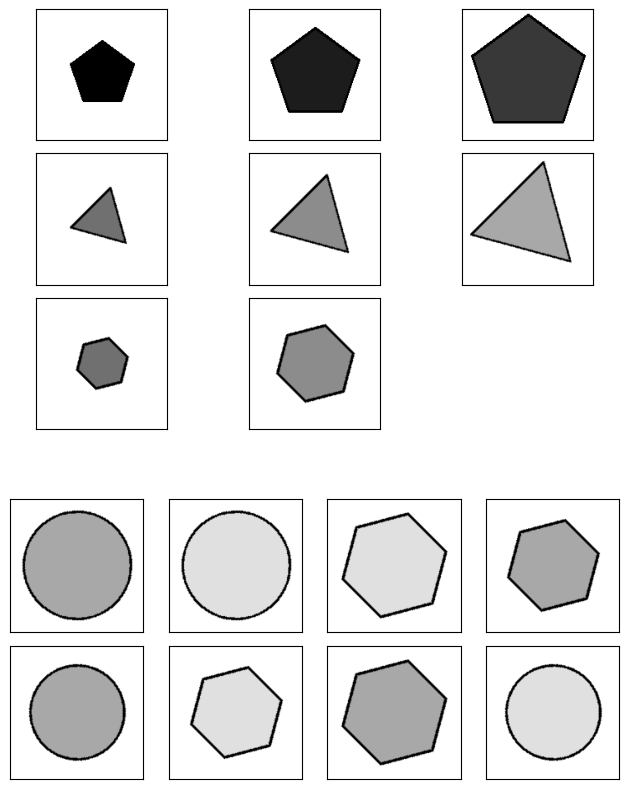

In [23]:
npz = np.load('./center_single/RAVEN_0_train.npz')
plot_example(npz['image'])
plt.show()